# Proyecto del Día 14 - Gestión Segura de Datos de Clientes

Este notebook implementa un sistema básico de gestión y análisis de datos de clientes, aplicando técnicas de pseudonimización, anonimización y balanceo de datos.


## Objetivo
El proyecto consiste en desarrollar un sistema de gestión y análisis de datos de clientes que implemente técnicas de pseudonimización, anonimización y balanceo de datos para proteger la privacidad de los usuarios y asegurar un análisis equitativo.


## Consignas del Proyecto
1. Cargar los datos de clientes provistos en un archivo CSV.
2. Aplicar técnicas de anonimización al campo `direccion`, `edad` y `salario` para proteger la identidad de los clientes.
3. Aplicar técnicas de pseudonimización al campo `nombre`.
4. Implementar una función de balanceo de datos para asegurar la representación equitativa de diversas categorías en el análisis posterior.
5. Realizar un análisis simple de los datos para identificar tendencias o patrones que podrían ser útiles para decisiones de negocios o marketing.


Este proyecto te permitirá aplicar prácticas esenciales de privacidad de datos y técnicas de manipulación de datos en un entorno práctico, preparándote para desafíos similares en entornos profesionales.

¡Mucha suerte y que te diviertas!

In [61]:
import os
import uuid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from dotenv import load_dotenv

In [62]:
load_dotenv('.env')

True

### 1. Cargar los datos de clientes provistos en un archivo CSV.

In [63]:
df: pd.DataFrame = pd.read_csv(os.environ['PROJECT_DATA'])

### 2. Aplicar técnicas de anonimización al campo `direccion`, `edad` y `salario` para proteger la identidad de los clientes.

In [64]:
# Anonimizar el campo dirección por simple supresión
# (asumiendo que no es relevante para el estudio)
df.drop(['direccion'], axis=1, inplace=True)

In [65]:
# Anonimizar el campo edad por redondeo o truncado
# en este caso, escogemos redondear al múltiplo de 10 más cercano
df['edad'] = df['edad'].round(-1)

In [66]:
# Anonimizar el campo salario con ruido aleatorio
noise: np.ndarray = np.random.normal(0, 10000, size=df['salario'].shape)
df['salario'] += noise

### 3. Aplicar técnicas de pseudonimización al campo `nombre`.

In [67]:
# Pseudonomización de los valores del campo nombre
# usando un identificador único universal (UUID) para cada valor
uuid_container: list[str] = []

for _ in range(len(df)):
    uuid_container.append(str(uuid.uuid4()))

df['uuid'] = uuid_container
df.drop(['nombre'], axis=1, inplace=True)

A partir de aquí, ya parece seguro mostrar algo de `df` para los siguientes pasos. 😁

In [68]:
df.head()

,edad,categoria,salario,uuid
0,60,0,70256.329588,3bfee0de-48c0-43c2-90c5-e05d416cea7a
1,60,1,52334.463852,b129d5d8-5d52-40cc-9de7-81d6b3f3a41f
2,20,0,40641.837759,014038f7-3a14-4191-9321-453ee603032a
3,20,1,36917.953170,e416fecd-fd9b-4c89-8ee7-571893e79f0b
4,20,1,38411.666258,3b23d6b8-2de8-4297-90d6-376ddfda8328


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   edad       200 non-null    int64  
 1   categoria  200 non-null    int64  
 2   salario    200 non-null    float64
 3   uuid       200 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 6.4+ KB


In [70]:
df.describe()

,edad,categoria,salario
count,200.000000,200.000000,200.000000
mean,42.550000,0.570000,48645.328904
std,15.977292,0.496318,15246.600128
min,20.000000,0.000000,9180.581526
25%,30.000000,0.000000,38179.143209
50%,40.000000,1.000000,48680.111241
75%,60.000000,1.000000,58087.509227
max,70.000000,1.000000,96509.811250


### 4. Implementar una función de balanceo de datos para asegurar la representación equitativa de diversas categorías en el análisis posterior.

Preliminarmente, los datos estadísticos de `df.describe()` parecen indicar que:

- Existen sólo dos categorías: `0` y `1`

- Hay más instancias para la segunda categoría que para la primera, tomando como referencia la media de `0.57`

No obstante, en honor a la rigurosidad, conviene verificar estos puntos antes de proceder con el objetivo de este paso.

In [71]:
df['categoria'].unique()

array([0, 1], dtype=int64)

Efectivamente, existen sólo dos categorías: `0` y `1`. Veamos la proporción exacta de ellas en el conjunto `df`:

In [72]:
category_0: int = (df['categoria'] == 0).sum()
category_1: int = (df['categoria'] == 1).sum()

print(f'Instancias de categoría 0: {category_0}')
print(f'Instancias de categoría 1: {category_1}')

Instancias de categoría 0: 86
Instancias de categoría 1: 114


Efectivamente, se verifica que hay un desbalance en la repartición de instancias entre categorías en el conjunto de datos, en una razón de 86:114 para las categorías `0` y `1`, respectivamente.

Por lo tanto, procederemos con las operaciones para asegurar la representación equitativa de ambas categorías.

In [73]:
grouped_df = df.groupby('categoria')

balanced_data: pd.DataFrame = pd.DataFrame()

for name, group in grouped_df:
    balanced_group = resample(
        group,
        replace=True,
        n_samples=114,
        random_state=123
    )
    balanced_data = pd.concat([balanced_data, balanced_group])

category_0 = (balanced_data['categoria'] == 0).sum()
category_1 = (balanced_data['categoria'] == 1).sum()

print(f'Instancias de categoría 0: {category_0}')
print(f'Instancias de categoría 1: {category_1}')

Instancias de categoría 0: 114
Instancias de categoría 1: 114


Las instancias de ambas categorías se han igualado exitosamente. Veamos las características de `balanced_data`:

In [74]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 158 to 11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   edad       228 non-null    int64  
 1   categoria  228 non-null    int64  
 2   salario    228 non-null    float64
 3   uuid       228 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 8.9+ KB


### 5. Realizar un análisis simple de los datos para identificar tendencias o patrones que podrían ser útiles para decisiones de negocios o marketing.

#### Relación entre categoría y edad

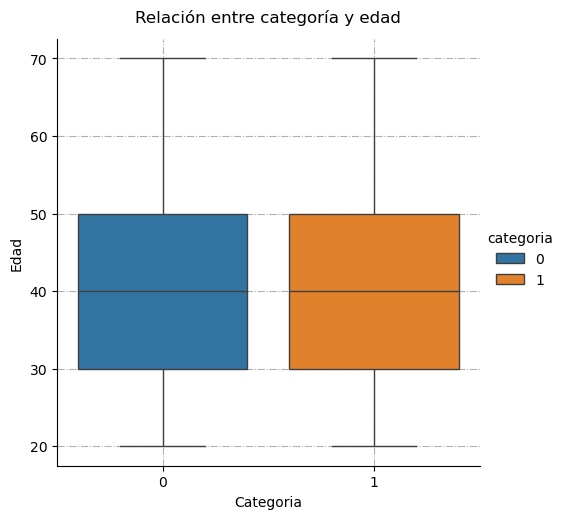

In [82]:
categoria_edad: sns.FacetGrid = sns.catplot(
    data=balanced_data,
    x='categoria',
    y='edad',
    kind='box',
    hue='categoria'
)
categoria_edad.set_axis_labels('Categoria', 'Edad')
plt.title('Relación entre categoría y edad', pad=12)
plt.grid(True, linestyle='-.')
plt.show()

No se observan diferencias en la relación entre categorías y edades. Ambos comparten un rango de personas de entre aprox. 20 y 70 años de edad, con una distribución idéntica entre sus cuartiles, y compartiendo la mediana alrededor de los 40 años de edad.

De todas maneras, sin tener en cuenta la distinción por categoría, sí se puede tener presente que el 50% de los clientes más jóvenes se encuentra en un rango de edad más acotado, de entre los 20 y los 40 años de edad aproximadamente (2 décadas), mientras que el 50% restante de los clientes abarca un rango de edad más amplio, de entre los 40 y los 70 años de edad aproximadamente (3 décadas).

#### Relación entre categoría y salario.

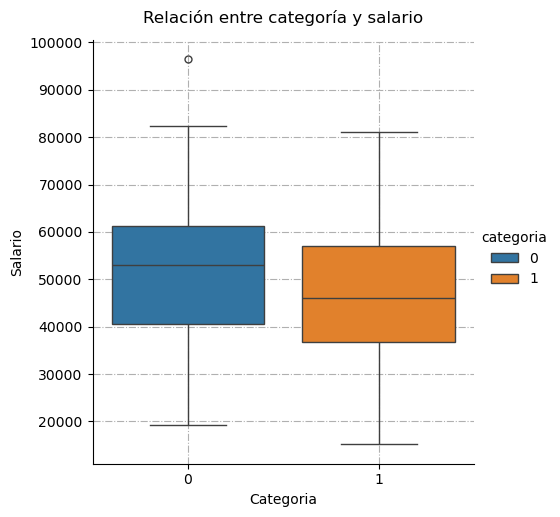

In [109]:
categoria_salario: sns.FacetGrid = sns.catplot(
    data=balanced_data,
    x='categoria',
    y='salario',
    kind='box',
    hue='categoria'
)
categoria_salario.set_axis_labels('Categoria', 'Salario')
plt.title('Relación entre categoría y salario', pad=12)
plt.grid(True, linestyle='-.')
plt.show()

El rango completo de salarios entre las categorías `0` y `1` es muy similar. No obstante, se aprecian diferencias entre los rangos intercuartílicos de ambas, donde se observa que:

- el 50% intercuartílico de los clientes de la categoría `0` poseen salarios superiores, de entre aproximadamente $40.000 y los $60.000, con la mediana de la categoría entre los $50.000 y los $60.000 y teniendo instancias atípicas que llegan a un salario entre los $90.000 y los $100.000,

- mientras que el 50% intercuartílico de los clientes de la categoría `1` poseen salarios inferiores, donde el segundo cuartil tiene un salario bajo los $40.000, y el tercer cuartil, bajo los $60.000, con la mediana de la categoría entre los $40.000 y los $50.000.

Por ende, los clientes de la categoría `0` poseen mayor poder de compra que los de la categoría `1`.